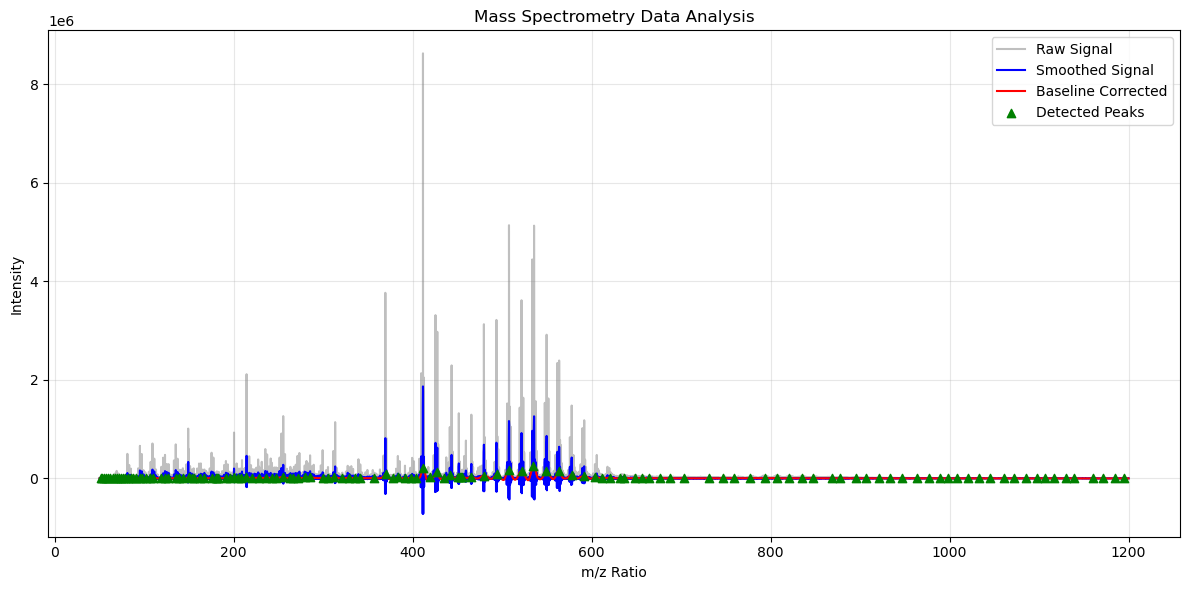

In [52]:
#Noise reduction

import numpy as np
import pandas as pd
import pywt
from scipy.signal import savgol_filter, find_peaks
import matplotlib.pyplot as plt

def load_data(filename, sheet_name=1):
    df = pd.read_excel(filename, sheet_name=sheet_name)
    mz = df.iloc[:, 0].values  # First column: m/z
    intensity = df.iloc[:, 1].values  # Second column: intensity
    return mz, intensity
    
peak_mz, peak_intensity = process_mass_spec('Test.xlsx')

def smooth_signal(intensity, window=11, poly=3):
    return savgol_filter(intensity, window, poly)

def baseline_correction(intensity, wavelet='db8', level=6):
    coeffs = pywt.wavedec(intensity, wavelet, mode="per")
    coeffs[-level:] = [np.zeros_like(c) for c in coeffs[-level:]]  
    return pywt.waverec(coeffs, wavelet, mode="per")[:len(intensity)]

def detect_peaks(mz, intensity, height=None, prominence=0.01):
    peaks, _ = find_peaks(intensity, height=height, prominence=prominence)
    return mz[peaks], intensity[peaks]

def process_mass_spec(filename, sheet_name=0):
    mz, intensity = load_data(filename, sheet_name)
    
    # Step 1: Smooth the signal
    smoothed = smooth_signal(intensity)
    
    # Step 2: Baseline correction
    corrected = baseline_correction(smoothed)
    
    # Step 3: Peak detection
    peak_mz, peak_intensity = detect_peaks(mz, corrected)
    
    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(mz, intensity, 'gray', alpha=0.5, label='Raw Signal')
    plt.plot(mz, smoothed, 'blue', label='Smoothed Signal')
    plt.plot(mz, corrected, 'red', label='Baseline Corrected')
    plt.scatter(peak_mz, peak_intensity, color='green', marker='^', 
               label='Detected Peaks', zorder=5)
    
    plt.xlabel('m/z Ratio')
    plt.ylabel('Intensity')
    plt.title('Mass Spectrometry Data Analysis')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return peak_mz, peak_intensity

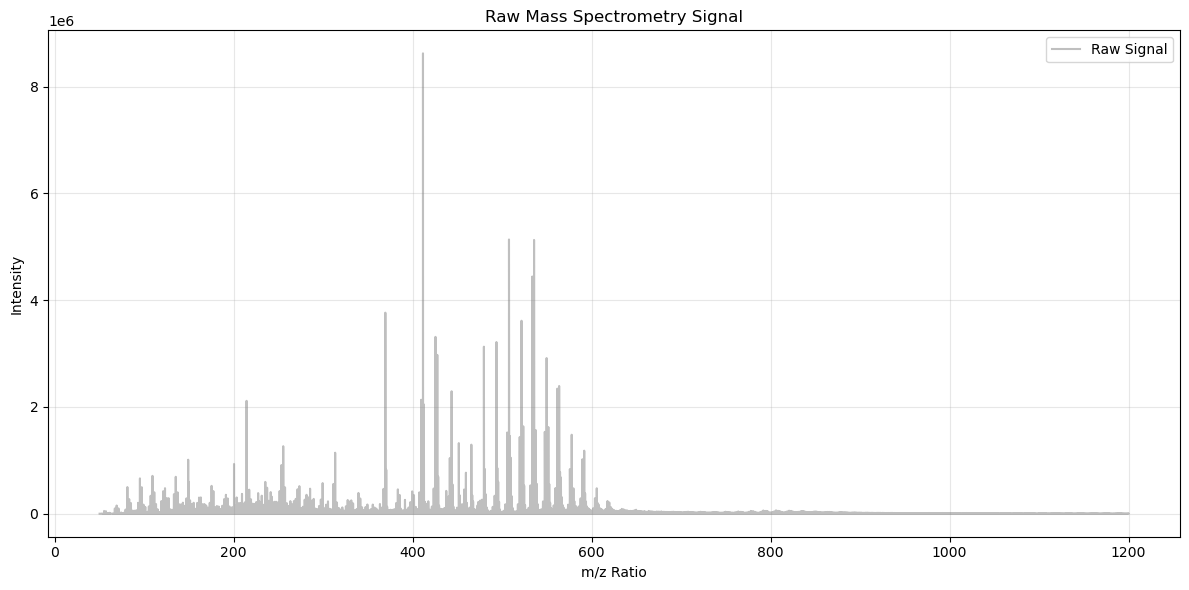

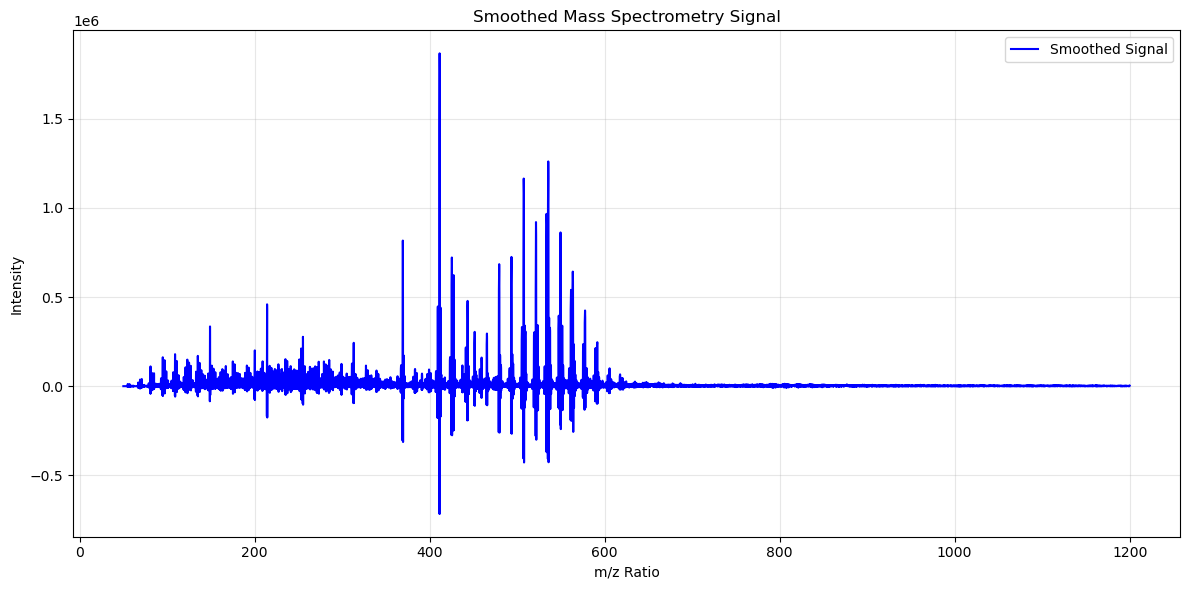

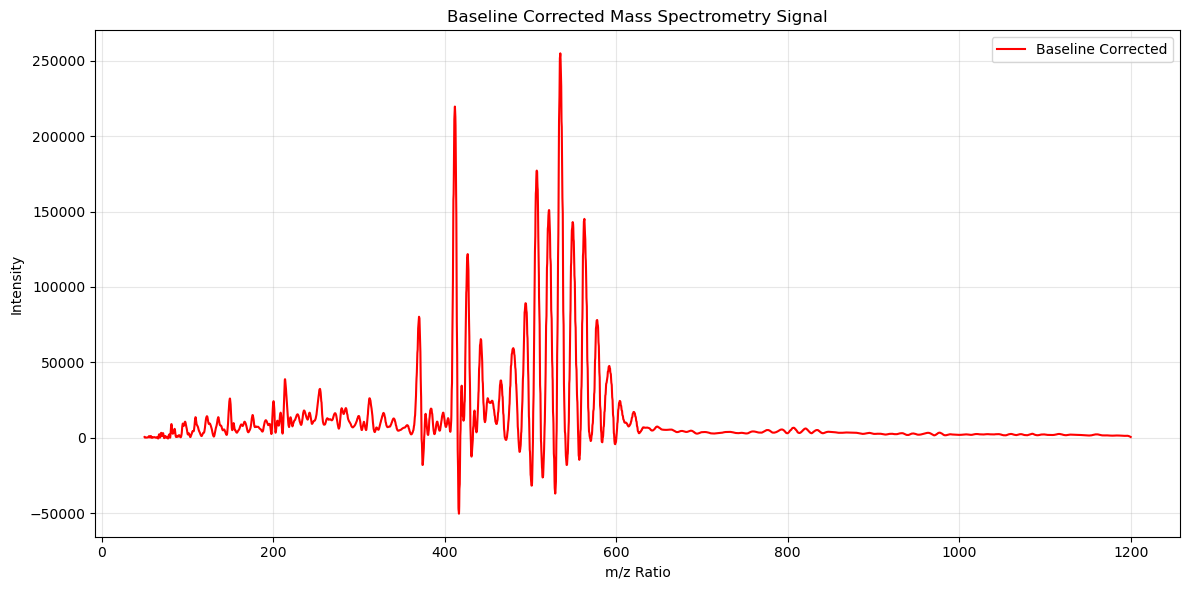

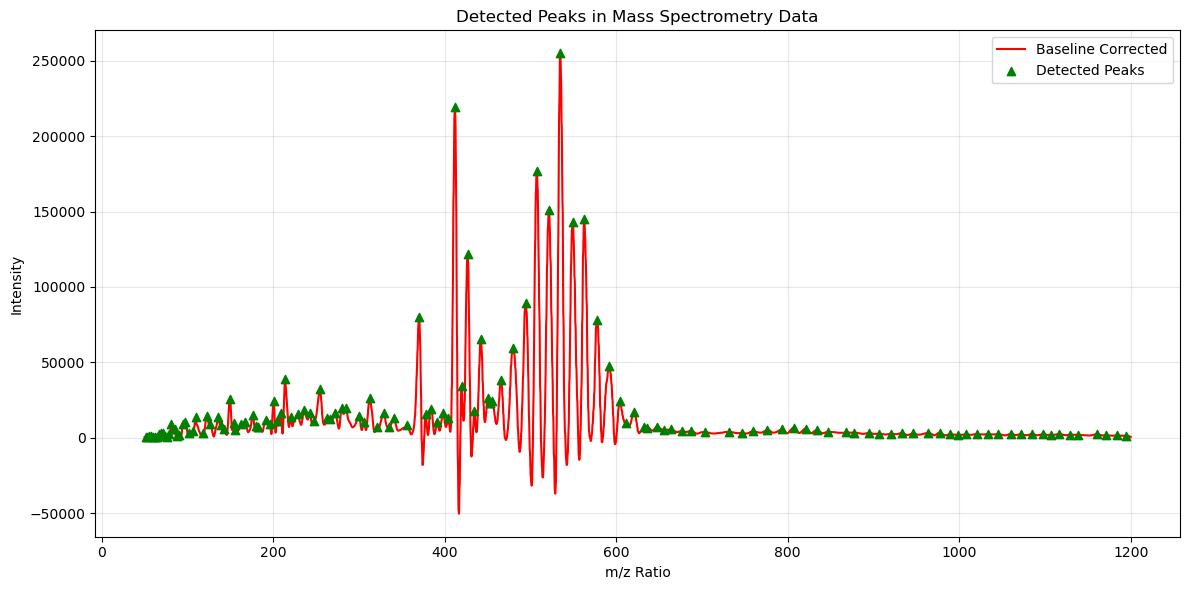

C:\Users\Rohit\AppData\Local\Temp\ipykernel_21100\3676894597.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


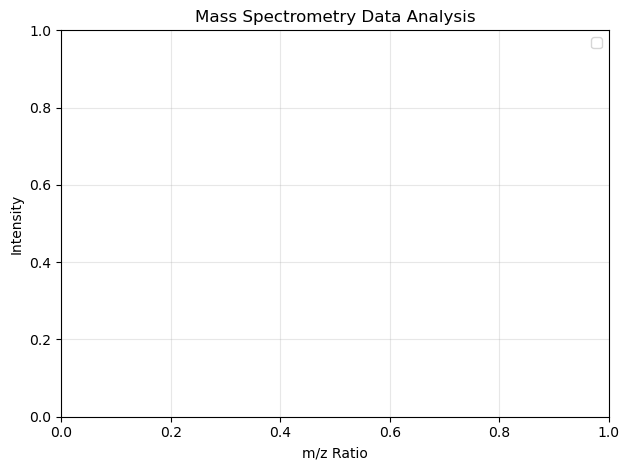

SyntaxError: 'return' outside function (3676894597.py, line 36)

In [50]:
#Noise reduction - Separated

import numpy as np
import pandas as pd
import pywt
from scipy.signal import savgol_filter, find_peaks
import matplotlib.pyplot as plt

def load_data(filename, sheet_name=1):
    df = pd.read_excel(filename, sheet_name=sheet_name)
    mz = df.iloc[:, 0].values  # First column: m/z
    intensity = df.iloc[:, 1].values  # Second column: intensity
    return mz, intensity
    
peak_mz, peak_intensity = process_mass_spec('Test.xlsx')

def smooth_signal(intensity, window=11, poly=3):
    return savgol_filter(intensity, window, poly)

# Step 1: Smooth the signal
    smoothed = smooth_signal(intensity)

# Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(mz, intensity, 'gray', alpha=0.5, label='Raw Signal')
    plt.plot(mz, smoothed, 'blue', label='Smoothed Signal')

plt.xlabel('m/z Ratio')
plt.ylabel('Intensity')
plt.title('Mass Spectrometry Data Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

return peak_mz, peak_intensity

Starting mass spectrometry analysis...


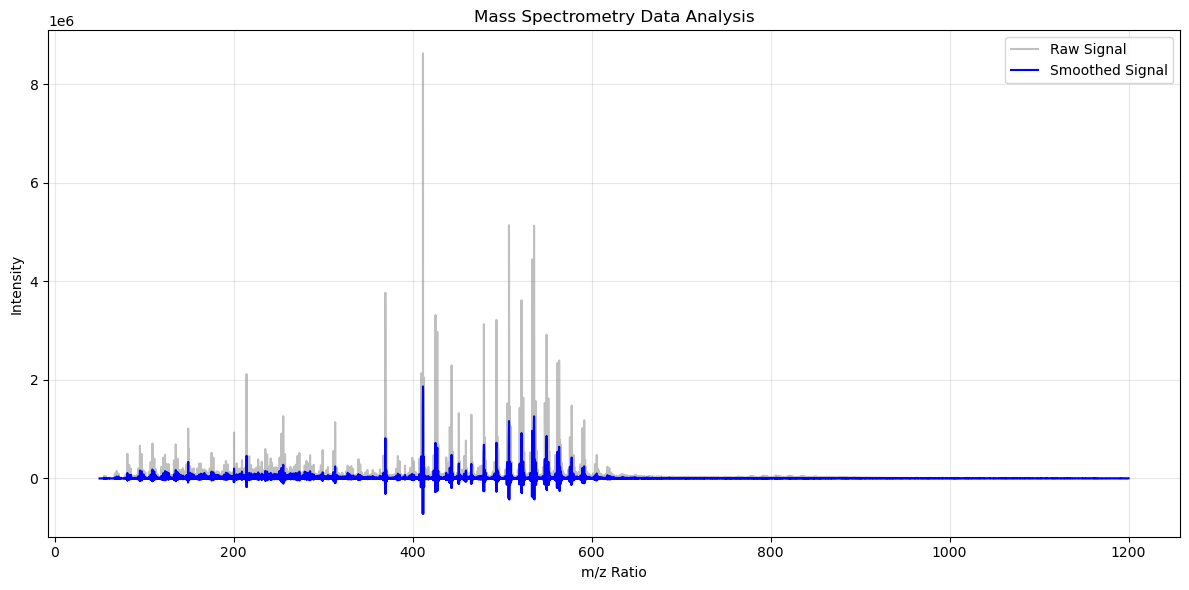

Smoothed data saved to smoothed_data.xlsx
Smoothing completed successfully!


In [54]:
import numpy as np
import pandas as pd
import pywt
from scipy.signal import savgol_filter, find_peaks
import matplotlib.pyplot as plt

def load_data(filename, sheet_name=1):
    df = pd.read_excel(filename, sheet_name=sheet_name)
    mz = df.iloc[:, 0].values  # First column: m/z
    intensity = df.iloc[:, 1].values  # Second column: intensity
    return mz, intensity

def smooth_signal(intensity, window=11, poly=3):
    return savgol_filter(intensity, window, poly)

def process_mass_spec(filename, sheet_name=0):
    # Load data
    mz, intensity = load_data(filename, sheet_name)
    
    # Step 1: Smooth the signal
    smoothed = smooth_signal(intensity)
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    plt.plot(mz, intensity, 'gray', alpha=0.5, label='Raw Signal')
    plt.plot(mz, smoothed, 'blue', label='Smoothed Signal')
    
    plt.xlabel('m/z Ratio')
    plt.ylabel('Intensity')
    plt.title('Mass Spectrometry Data Analysis')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Save to Excel file
    df_smoothed = pd.DataFrame({
        'm/z': mz,
        'Raw Intensity': intensity,
        'Smoothed Intensity': smoothed
    })
    output_filename = 'smoothed_data.xlsx'
    df_smoothed.to_excel(output_filename, index=False)
    print(f"Smoothed data saved to {output_filename}")
    
    return smoothed

# Now you can safely call the function
print("Starting mass spectrometry analysis...")
smoothed_data = process_mass_spec('Test.xlsx')
print("Smoothing completed successfully!")

Processed data saved to 'Processed_MS_Data.xlsx'
Detected peaks saved to 'Detected_Peaks.xlsx'


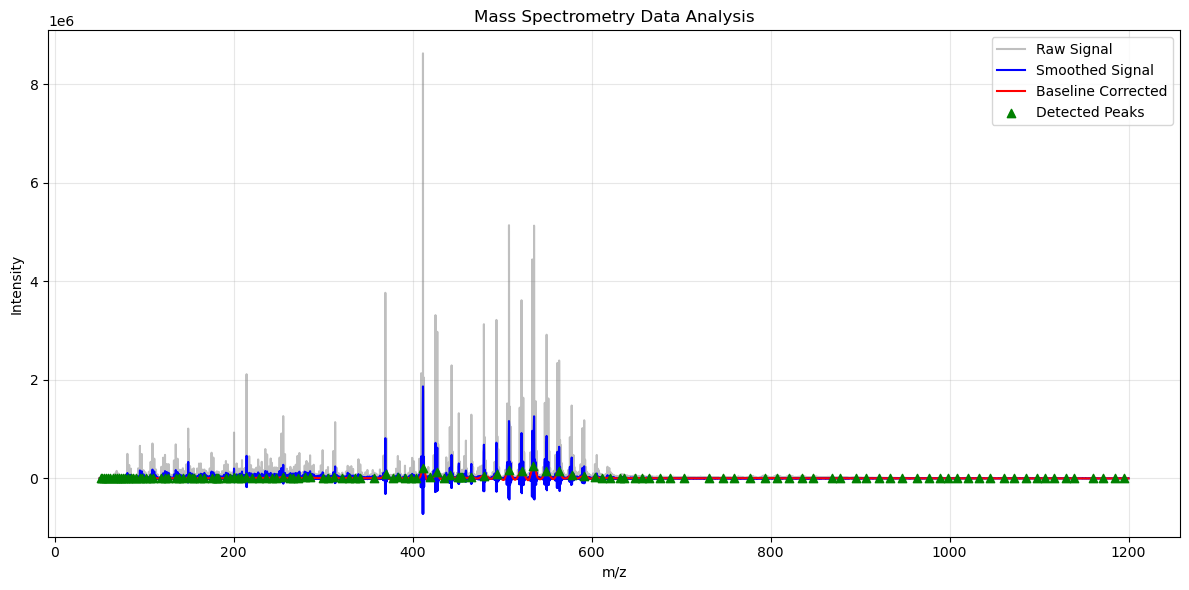

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
from scipy.signal import savgol_filter, find_peaks

def load_data(file_path):
    """Loads mass spectrometry data from an Excel file."""
    df = pd.read_excel(file_path)
    df.columns = ['m/z', 'Intensity']  # Ensure correct column names
    df['Intensity'] = df['Intensity'].astype(float)  # Convert Intensity to float
    return df

def smooth_signal(intensity, window=11, poly=3):
    """Applies Savitzky-Golay smoothing to reduce noise."""
    return savgol_filter(intensity, window, poly)

def baseline_correction(intensity, wavelet='db8', level=6):
    """Performs baseline correction using wavelet decomposition."""
    coeffs = pywt.wavedec(intensity, wavelet, mode="per")
    coeffs[-level:] = [np.zeros_like(c) for c in coeffs[-level:]]  
    return pywt.waverec(coeffs, wavelet, mode="per")[:len(intensity)]

def detect_peaks(mz, intensity, height=None, prominence=0.01):
    """Detects peaks based on intensity prominence."""
    peaks, _ = find_peaks(intensity, height=height, prominence=prominence)
    return mz[peaks], intensity[peaks]

def plot_spectrum(mz, intensity, smoothed, corrected, peak_mz, peak_intensity, mz_min=100, mz_max=600):
    """Plots raw, smoothed, and baseline-corrected spectra with detected peaks."""
    plt.figure(figsize=(12, 6))
    plt.plot(mz, intensity, 'gray', alpha=0.5, label='Raw Signal')
    plt.plot(mz, smoothed, 'blue', label='Smoothed Signal')
    plt.plot(mz, corrected, 'red', label='Baseline Corrected')
    plt.scatter(peak_mz, peak_intensity, color='green', marker='^', label='Detected Peaks', zorder=5)
    plt.xlabel("m/z")
    plt.ylabel("Intensity")
    plt.title("Mass Spectrometry Data Analysis")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def process_mass_spec(file_path):
    """Processes mass spectrometry data with smoothing, baseline correction, and peak detection."""
    df = load_data(file_path)
    mz, intensity = df['m/z'].values, df['Intensity'].values
    
    # Apply smoothing and baseline correction
    smoothed = smooth_signal(intensity)
    corrected = baseline_correction(smoothed)
    
    # Peak detection
    peak_mz, peak_intensity = detect_peaks(mz, corrected)
    
    # Save processed data
    processed_df = pd.DataFrame({'m/z': mz, 'Raw Intensity': intensity, 'Smoothed Intensity': smoothed, 'Corrected Intensity': corrected})
    processed_df.to_excel("Processed_MS_Data.xlsx", index=False)
    print("Processed data saved to 'Processed_MS_Data.xlsx'")
    
    # Save detected peaks
    peak_df = pd.DataFrame({'m/z': peak_mz, 'Intensity': peak_intensity})
    peak_df.to_excel("Detected_Peaks.xlsx", index=False)
    print("Detected peaks saved to 'Detected_Peaks.xlsx'")
    
    # Plot results
    plot_spectrum(mz, intensity, smoothed, corrected, peak_mz, peak_intensity)

def main():
    file_path = "Test.xlsx"  # Change this to your actual file path
    process_mass_spec(file_path)
    
if __name__ == "__main__":
    main()
